<a href="https://www.kaggle.com/code/stevenmpro/spaceship-titanic?scriptVersionId=104534613" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This notebook is created to respond to the competition and improve my knowledge of how kaggle works.

In order to use all functions, this notebook is based on Arif Enes Aydın's.

Link : https://www.kaggle.com/code/arifenesaydn/spaceship-titanic

### 1. Importing the librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### 2. Importing the data:

In [2]:
# Listing directoriers and files

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [3]:
# Loading data

train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
x_train = train.drop(columns='Transported')
y_train = train.loc[:, 'Transported']
x_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')


In [4]:
train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
x_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### 3. First analyses

In [6]:
print(f'train_set : {train.shape}')
print(f'test_set : {x_test.shape}')

train_set : (8693, 14)
test_set : (4277, 13)


### Target exploration

In [7]:
y_train

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

<BarContainer object of 2 artists>

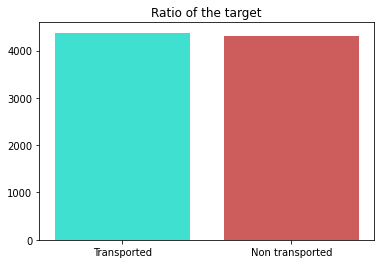

In [8]:
plt.title('Ratio of the target')
plt.bar(x=['Transported', 'Non transported'], height=y_train.value_counts(), color=('turquoise', 'indianred'))

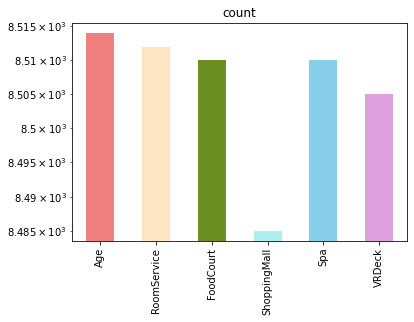

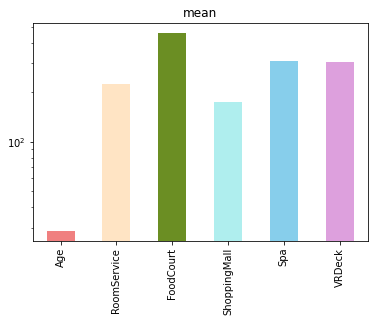

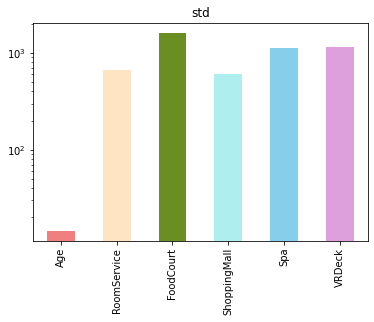

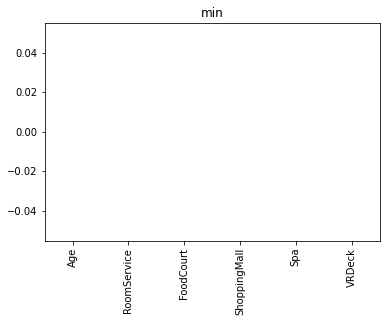

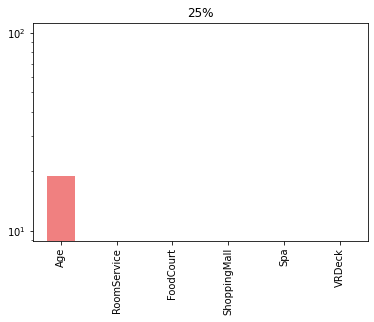

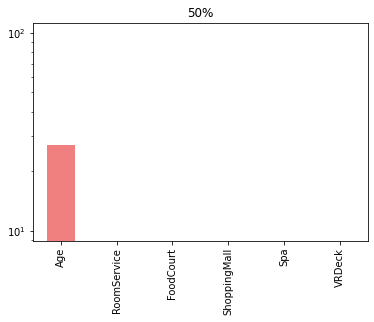

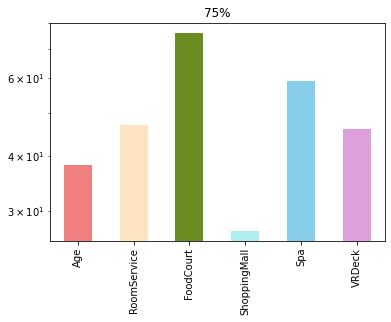

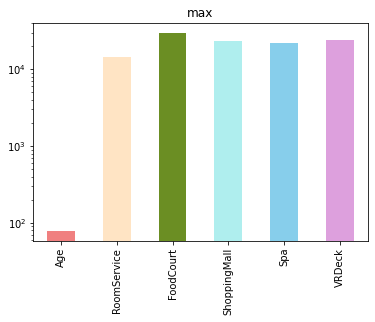

In [9]:
color = ['lightcoral', 'bisque', 'olivedrab', 'paleturquoise', 'skyblue', 'plum']

for col in train.describe().T:
    train.describe().T[col].plot.bar(color=color)
    plt.title(col)
    if col != 'min':
        plt.yscale('log')
        
    plt.show()

In [10]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [12]:
np.random.rand()

0.6480530485532222

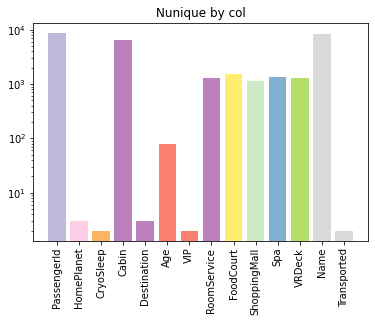

In [13]:
np.random.seed(1234)
cmap = matplotlib.cm.get_cmap('Set3')
color = [cmap(np.random.rand()) for _ in range(train.shape[1])]

plt.bar(train.columns,train.nunique(), color=color)
plt.title('Nunique by col')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

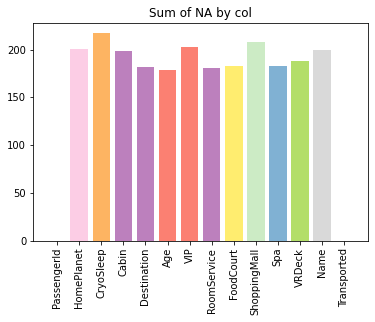

In [14]:
plt.bar(train.columns, train.isnull().sum(), color=color)
plt.title('Sum of NA by col')
plt.xticks(rotation=90)
plt.show()

### 4. DataCleaning and feature engineering 

In [15]:
# Cabin
x_train['Cabin'] = x_train['Cabin'].str[-1]
x_test['Cabin'] = x_test['Cabin'].str[-1]

In [16]:
# Impute Categorical

categorical = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
def impute_categorical(source, column_list):
    for column in column_list:
        label_count = int(source[column].nunique())
        mode = source[column].mode()[0]
        source[column].fillna(mode, inplace=True)

impute_categorical(x_train, categorical)
impute_categorical(x_test, categorical)

In [17]:
# Impute Bills

bills = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

def impute_bills(source, column_list):
    for column in column_list:
        source[column].fillna(0.0, inplace=True)
    
impute_bills(x_train, bills)
impute_bills(x_test, bills)

In [18]:
# Impute Age

def impute_age(source):
    imputer = SimpleImputer(strategy='mean')
    imputer.fit(source[['Age']])
    source[['Age']] = imputer.transform(source[['Age']])
    
impute_age(x_train)
impute_age(x_test)

In [19]:
# Sum Bills

def merge_bills(source):
    source['Bills'] = source[bills].sum(axis=1)

merge_bills(x_train)
merge_bills(x_test)

In [20]:
x_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Bills             0
dtype: int64

In [21]:
# Drop Redundan
pass_id = np.array(x_test['PassengerId'])
to_drop = ['PassengerId', 'Name'] + bills

def drop(source, to_drop):
    return source.drop(columns=to_drop)
    
x_train = drop(x_train, to_drop)  
x_test = drop(x_test, to_drop)

### 5. Preprocessing

In [22]:
binary_categorical = ['CryoSleep', 'VIP', 'Cabin']
multi_category = list(set(categorical) - set(binary_categorical))

def encode_multi(source, column):
    ohe = OneHotEncoder()
    return pd.DataFrame(ohe.fit_transform(source[[column]]).toarray(), columns=ohe.get_feature_names_out())

for column in multi_category:
    x_train = pd.concat([x_train, encode_multi(x_train, column)], axis=1)
    x_test = pd.concat([x_test, encode_multi(x_test, column)], axis=1)

In [23]:
def encode_binary(source, column):
    le = LabelEncoder()
    return le.fit_transform(source[[column]].values.ravel())

for column in binary_categorical:
    x_train[column] = encode_binary(x_train, column)
    x_test[column] = encode_binary(x_test, column)

In [24]:
x_train = drop(x_train, multi_category)  
x_test = drop(x_test, multi_category)

In [25]:
ss = StandardScaler()
x_train[['Age', 'Bills']] = ss.fit_transform(x_train[['Age', 'Bills']])
x_test[['Age', 'Bills']] = ss.fit_transform(x_test[['Age', 'Bills']])
display(x_train.head(3), x_test.head(3))

,CryoSleep,Cabin,Age,VIP,Bills,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0,0,0.709437,0,-0.514066,0.0,0.0,1.0,0.0,1.0,0.0
1,0,1,-0.336717,0,-0.251479,0.0,0.0,1.0,1.0,0.0,0.0
2,0,1,2.034566,1,3.190333,0.0,0.0,1.0,0.0,1.0,0.0


,CryoSleep,Cabin,Age,VIP,Bills,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1,1,-0.118222,0,-0.503425,0.0,0.0,1.0,1.0,0.0,0.0
1,0,1,-0.688601,0,0.502231,0.0,0.0,1.0,1.0,0.0,0.0
2,1,1,0.166968,0,-0.503425,1.0,0.0,0.0,0.0,1.0,0.0


In [26]:
y_train = LabelEncoder().fit_transform(y_train)

### 6. Model training

In [27]:
LR = LogisticRegression(solver='liblinear')
KNC = KNeighborsClassifier()
LR.fit(x_train, y_train)
prediction = LR.predict(x_test)

### 7. Prediction

In [28]:
data = {'PassengerId': pass_id, 'Transported': prediction}
pred_df = pd.DataFrame.from_dict(data)
pred_df['Transported'].replace({0: False, 1:True}, inplace=True)

### 8. Submission

In [29]:
pred_df.to_csv('submission.csv', index=False)